In [ ]:
# Installasi dan Import Library

!pip install -q imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv.xls')

In [ ]:
# Pembersihan Data
df = df.drop(columns=['id']) # karena kolom id tidak dibutuhkan untuk diprediksi
df['bmi'] = SimpleImputer(strategy='mean').fit_transform(df[['bmi']]) # untuk mengisi nilai kosong di kolom BMI dengan rata-rata


In [ ]:
# Encoding Atribut Kategorikal

# mengubah data teks ke bentuk angka
kategori = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for kolom in kategori:
  df[kolom] = LabelEncoder().fit_transform(df[kolom])

In [ ]:
# Pisahkan fitur dan Label
x = df.drop(columns='stroke') # fitur (inputnya)
y = df['stroke'] # target (outpunya)

In [ ]:
# Menormalisasi Data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # untuk algoritma berbasis jarak seperti KNN

In [ ]:
# Pembagian Data

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Mencari nilai k sebelum SMOTE
print("=== Evaluasi Model SEBELUM SMOTE ===")
param_grid = {'n_neighbors': list(range(1, 21))}  # Coba nilai k dari 1 sampai 20
grid_before = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_before.fit(X_train, y_train)
best_k_before = grid_before.best_params_['n_neighbors']
print(f"Nilai k terbaik (sebelum SMOTE): {best_k_before}")



=== Evaluasi Model SEBELUM SMOTE ===
Nilai k terbaik (sebelum SMOTE): 8


In [ ]:
# Evaluasi Model sebelum SMOTE
model_before = KNeighborsClassifier(n_neighbors=best_k_before)
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)

print("=== Classification Report SEBELUM SMOTE ===")
print(classification_report(y_test, y_pred_before))
print("Accuracy:", accuracy_score(y_test, y_pred_before))

=== Classification Report SEBELUM SMOTE ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Accuracy: 0.9510763209393346


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


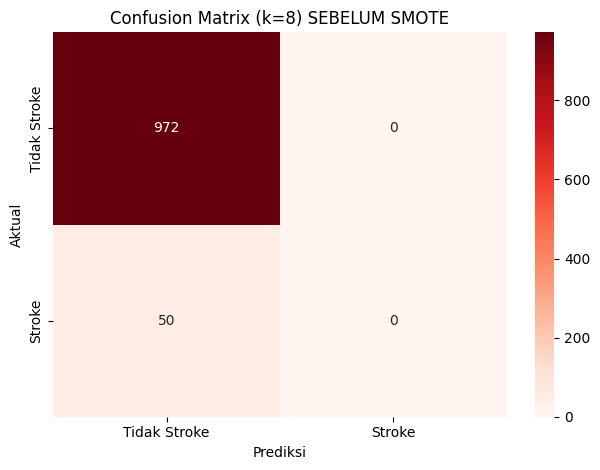

In [ ]:
# Confusion matrix sebelum SMOTE
conf_matrix_before = confusion_matrix(y_test, y_pred_before)
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Tidak Stroke', 'Stroke'],
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title(f'Confusion Matrix (k={best_k_before}) SEBELUM SMOTE')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [ ]:
# Menangani Ketidakseimbangan Data dengan SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
# Mencari nilai k terbaik dengan Grid Search

param_grid = {'n_neighbors': list(range(1,21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_sm, y_train_sm)
best_k = grid.best_params_['n_neighbors']
print(f"Nilai k terbaik adalah {best_k}")

Nilai k terbaik adalah 1


In [ ]:
# Melatih Model K-NN

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Evaluasi Model Setelah SMOTE

y_pred = model.predict(X_test)
print("=== Laporan Klasifikasi ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.09      0.16      0.12        50

    accuracy                           0.88      1022
   macro avg       0.52      0.54      0.53      1022
weighted avg       0.91      0.88      0.90      1022

Accuracy: 0.8825831702544031


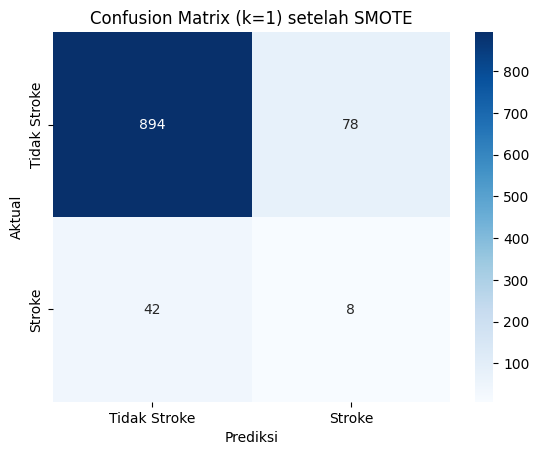

In [ ]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Stroke', 'Stroke'],
            yticklabels=['Tidak Stroke', 'Stroke'])
plt.title(f'Confusion Matrix (k={best_k}) setelah SMOTE')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

/tmp/ipython-input-38-495711739.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Tidak Stroke', 'Stroke'])
/tmp/ipython-input-38-495711739.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Perempuan', 'Laki-laki', 'Lainnya'])
/tmp/ipython-input-38-495711739.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['Tidak', 'Ya'])
/tmp/ipython-input-38-495711739.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Tidak', 'Ya'])


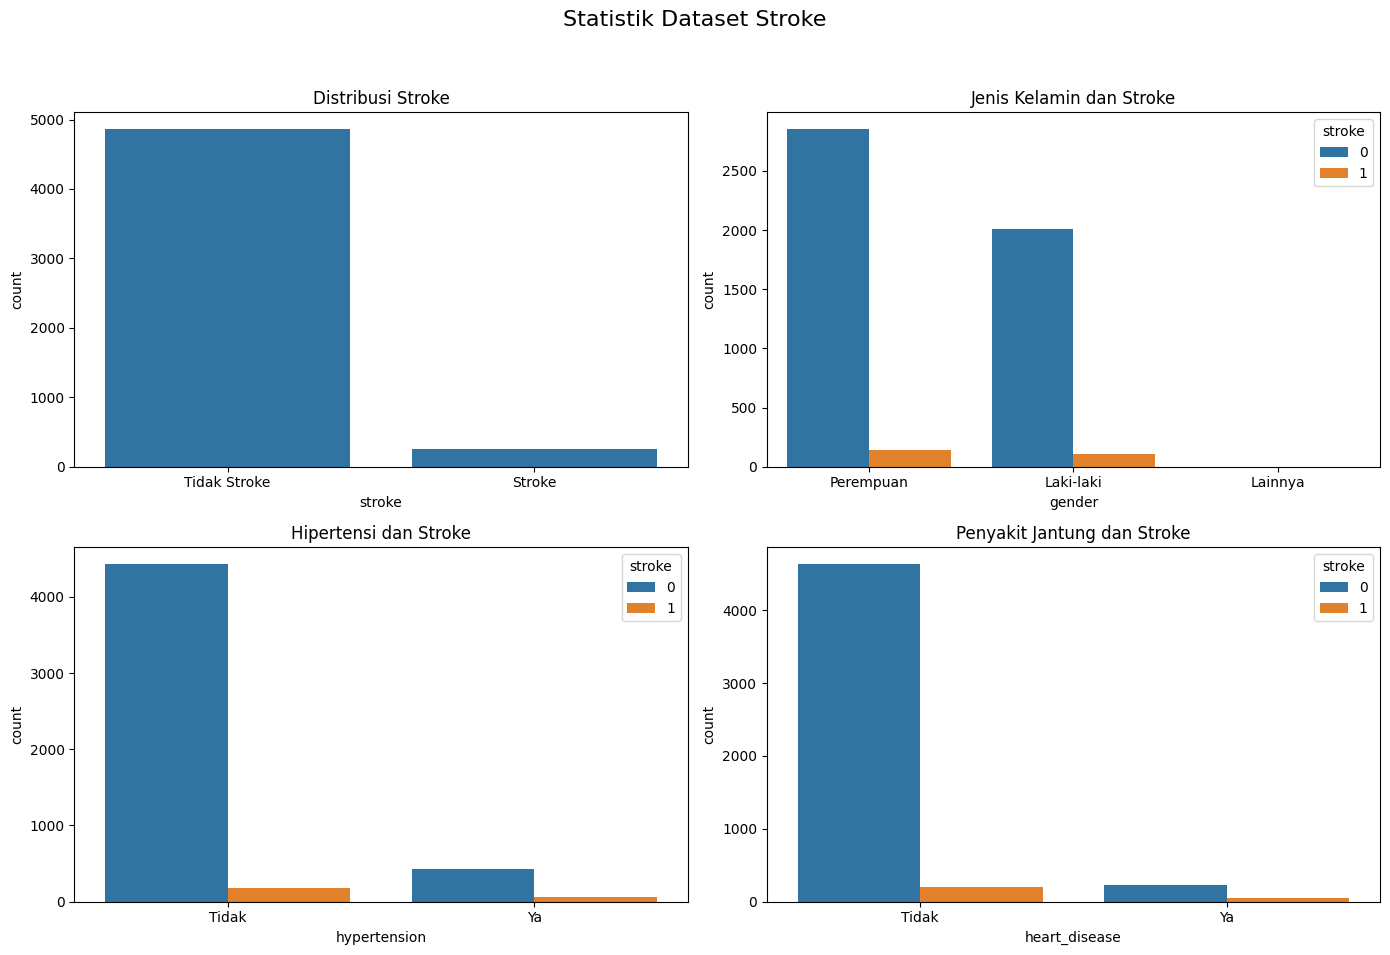

In [ ]:
# Visualisasi Statistik Dataset

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Statistik Dataset Stroke', fontsize=16)

# distribusi untuk target stroke
sns.countplot(x='stroke', data=df, ax=axes[0,  0])
axes[0, 0].set_title('Distribusi Stroke')
axes[0, 0].set_xticklabels(['Tidak Stroke', 'Stroke'])

# gender dan stroke
sns.countplot(x='gender', hue='stroke', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Jenis Kelamin dan Stroke')
axes[0, 1].set_xticklabels(['Perempuan', 'Laki-laki', 'Lainnya'])

# hipertensi dan stroke
sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Hipertensi dan Stroke')
axes[1, 0].set_xticklabels(['Tidak', 'Ya'])

# penyakit jantung dan stroke
sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Penyakit Jantung dan Stroke')
axes[1, 1].set_xticklabels(['Tidak', 'Ya'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()